In [46]:
# !pip install textblob_fr
# pip install transformers torch

# Import des données

In [47]:
import pandas as pd

file_path = '/kaggle/input/update-predicted/updated_predictions.csv'  # Remplacez 'your_file.csv' par le nom réel de votre fichier

# Essayer de lire le fichier avec un encodage différent
df = pd.read_csv(file_path)

# Afficher les 5 premières lignes pour vérifier
print(df.head())

   label          id                                               text  \
0    NaN  DMAMGYZL53  La proposition du PRD sur la règle de 10%\n\nL...   
1    NaN  TTRAZK9XGJ  [ VIDEO ]  (ex-Destiny’s Child) montre ses sei...   
2    NaN  T2YIHR1I2U  Égypte : La FSBB exprime sa " préoccupation " ...   
3    NaN  A6CVE0463M  Laser du lundi : Quand  se meut entre étau et ...   
4    NaN  198HBJZBRZ  Covid en Chine : le bilan s'alourdit à Shangha...   

   predicted_label  confidence CLS_Relevance Yes/No  predicted_label_MLM  \
0                0    0.857464               No (m)                    0   
1                0    0.849603               No (m)                    0   
2                0    0.853480               No (m)                    0   
3                0    0.855187              Yes (m)                    0   
4                0    0.867945               No (m)                    0   

   confidence_mlm  
0        0.888808  
1        0.890578  
2        0.901031  
3        0.8

In [48]:
unique_sentiments = df['predicted_label_MLM'].unique()
print(unique_sentiments)

[0 1]


In [49]:
# on garde que les articles pertinents 
filtered_df = df[df['predicted_label_MLM'] == 1]
print(filtered_df)

      label          id                                               text  \
5       NaN  RJ5H4F3A8T  "  " : quand les tensions entre le Maroc et l’...   
10      NaN  MAOS6IZWSH  Bradage des terres de l’aéroport léopold sédar...   
22      NaN  OQ8FYHDR2Q  COP21 : la Tunisie et 6 autres nouveaux pays a...   
25      NaN  CHIOM99SJZ  Saint-Louis- élection présidentielle de 2024 :...   
46      NaN  NHHFVWZDHE  Location de terres agricoles en milieu rural a...   
...     ...         ...                                                ...   
9346    NaN  TUDIKWP2XH  L’Afrique face à l’Ukraine : s’engager, oui, s...   
9356    NaN  QER9ZQEBV5  Les députés en séance plénière pour l’examen d...   
9371    NaN  25U6N7JIBP  Forum sur l’investissement à Ryad: l’appel de ...   
9379    NaN  6HO4NJIYBE  Communiqué de presse du MFDC\n\nMouvement pour...   
9392    NaN  EPVVMJ57U7  Changement climatique : plaidoyer pour ''plus ...   

      predicted_label  confidence CLS_Relevance Yes/No  predict

# Analyse de sentiment

In [50]:
import pandas as pd
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

def analyze_sentiment(text):
    # Création d'un objet TextBlob en utilisant les analyseurs de texte français
    analysis = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    polarity, subjectivity = analysis.sentiment
    if polarity > 0.15:
        sentiment = 'Positif'
    elif polarity < 0.13:
        sentiment = 'Négatif'
    else:
        sentiment = 'Neutre'
    return polarity, subjectivity, sentiment

# Appliquer la fonction pour analyser les sentiments et stocker les résultats dans de nouvelles colonnes
results = filtered_df['text'].apply(lambda text: pd.Series(analyze_sentiment(text)))
filtered_df.loc[:, 'Polarity'] = results[0]
filtered_df.loc[:, 'Subjectivity'] = results[1]
filtered_df.loc[:, 'Sentiment_blob'] = results[2]

print(filtered_df.head())

    label          id                                               text  \
5     NaN  RJ5H4F3A8T  "  " : quand les tensions entre le Maroc et l’...   
10    NaN  MAOS6IZWSH  Bradage des terres de l’aéroport léopold sédar...   
22    NaN  OQ8FYHDR2Q  COP21 : la Tunisie et 6 autres nouveaux pays a...   
25    NaN  CHIOM99SJZ  Saint-Louis- élection présidentielle de 2024 :...   
46    NaN  NHHFVWZDHE  Location de terres agricoles en milieu rural a...   

    predicted_label  confidence CLS_Relevance Yes/No  predicted_label_MLM  \
5                 0    0.606776               No (m)                    1   
10                0    0.816456              Yes (m)                    1   
22                0    0.757143               No (m)                    1   
25                1    0.637125              Yes (m)                    1   
46                1    0.605540               No (m)                    1   

    confidence_mlm  Polarity  Subjectivity Sentiment_blob  
5         0.729357  

/tmp/ipykernel_35/1586170551.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Polarity'] = results[0]
/tmp/ipykernel_35/1586170551.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Subjectivity'] = results[1]
/tmp/ipykernel_35/1586170551.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

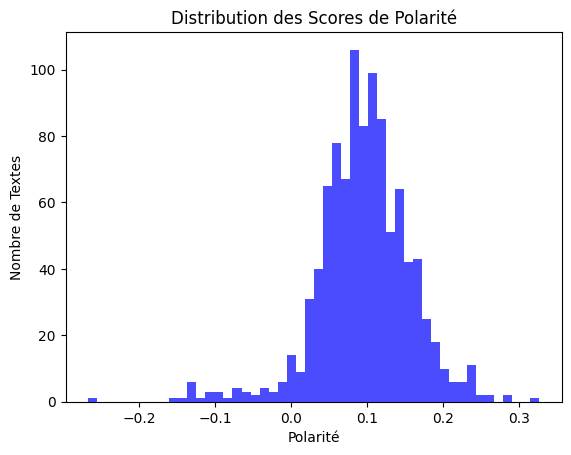

In [51]:
import matplotlib.pyplot as plt

# Génération des scores de polarité pour l'ensemble du DataFrame
polarities = filtered_df['text'].apply(lambda text: TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0])

# Affichage de la distribution des scores de polarité
plt.hist(polarities, bins=50, color='blue', alpha=0.7)
plt.title('Distribution des Scores de Polarité')
plt.xlabel('Polarité')
plt.ylabel('Nombre de Textes')
plt.show()


In [52]:
unique_sentiments = filtered_df['Sentiment_blob'].unique()
print(unique_sentiments)

['Négatif' 'Positif' 'Neutre']


In [53]:
# Sélectionner un texte de chaque classe de sentiment
texte_positif = filtered_df[filtered_df['Sentiment_blob'] == 'Positif']['text'].iloc[0]
texte_negatif = filtered_df[filtered_df['Sentiment_blob'] == 'Négatif']['text'].iloc[0]
texte_neutral = filtered_df[filtered_df['Sentiment_blob'] == 'Neutre']['text'].iloc[0]
        
# Afficher les textes sélectionnés
print("Texte Positif:", texte_positif)
print("Texte Négatif:", texte_negatif)
print("Texte Neutre:", texte_neutral)

Texte Positif: INNOVATIONS TECHNOLOGIQUES :  conçoit une dépulpeuse-raffineuse de "ditakh"

Pour une meilleure exploitation du Detarium senegalensis, communément appelé « ditakh »,  de l’Ita a conçu une machine dépulpeuse-raffineuse de ce fruit.
Une nouvelle invention de l’Institut de technologie alimentaire (Ita) a été présentée, la semaine dernière, au grand public. Chercheure-ingénieure en Développement agroalimentaire et Transfert de technologie à l’Atelier fruits et légumes de l’Ita qu’elle dirige,  est fière de présenter le résultat de plusieurs années de recherches. Sa nouvelle trouvaille : une dépulpeuse-raffineuse du « ditakh », un fruit local qu’elle a décidé d’appeler « Licka’S », du nom sa mère bien aimée : . Cette spécialiste en Procédés et Technologies de transformation des fruits et légumes locaux a constaté qu’au Sénégal, le Detarium senegalensis fait partie des espèces forestières les plus importantes dans l’économie d’exploitation. « Le fruit, appelé « ditakh » en wol

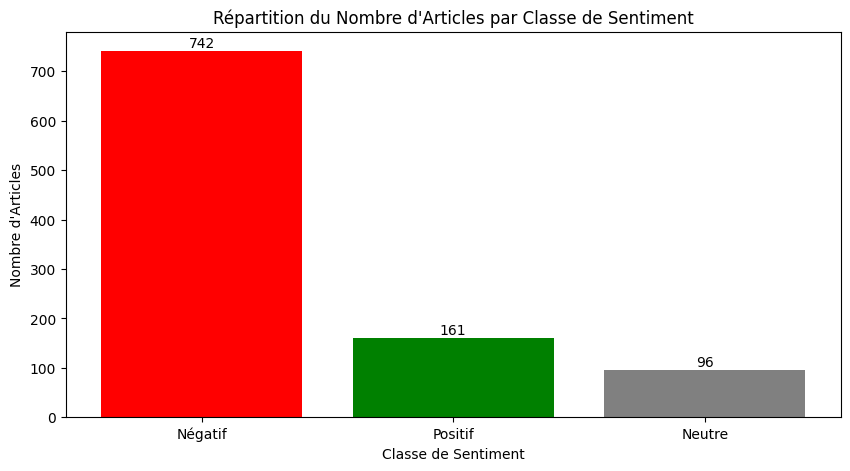

In [54]:
# Compter le nombre d'articles par classe de sentiment
sentiment_counts = filtered_df['Sentiment_blob'].value_counts()

# Définir les couleurs selon la classe de sentiment
colors = ['green' if sentiment == 'Positif' else 'red' if sentiment == 'Négatif' else 'gray' for sentiment in sentiment_counts.index]
        
# Créer un graphique à barres pour visualiser la répartition
plt.figure(figsize=(10, 5))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

# Ajouter le nombre d'articles au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Répartition du Nombre d\'Articles par Classe de Sentiment')
plt.xlabel('Classe de Sentiment')
plt.ylabel('Nombre d\'Articles')
plt.xticks(rotation=0)
plt.show()

# Analyse de sentiment avec BERT

In [55]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

# Charger le modèle et le tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Vérifier si CUDA est disponible et déplacer le modèle sur le GPU
if torch.cuda.is_available():
    model = model.to('cuda')

def analyze_sentiment_bert(text):
    # Préparer les données d'entrée
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    # Déplacer les données d'entrée sur le GPU si disponible
    if torch.cuda.is_available():
        inputs = {k: v.to('cuda') for k, v in inputs.items()}
    
    # Exécuter le modèle en mode évaluation et sans calcul de gradients
    with torch.no_grad():
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=-1)
    
    # Calculer la classe de sentiment et la confiance
    sentiment_score = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][sentiment_score].item()

    # Renvoyer les résultats
    return sentiment_score, confidence

# Appliquer l'analyse de sentiment sur le DataFrame
filtered_df['Sentiment_classe'], filtered_df['Confidence'] = zip(*filtered_df['text'].apply(analyze_sentiment_bert))

# Afficher les résultats
print(filtered_df.head())


    label          id                                               text  \
5     NaN  RJ5H4F3A8T  "  " : quand les tensions entre le Maroc et l’...   
10    NaN  MAOS6IZWSH  Bradage des terres de l’aéroport léopold sédar...   
22    NaN  OQ8FYHDR2Q  COP21 : la Tunisie et 6 autres nouveaux pays a...   
25    NaN  CHIOM99SJZ  Saint-Louis- élection présidentielle de 2024 :...   
46    NaN  NHHFVWZDHE  Location de terres agricoles en milieu rural a...   

    predicted_label  confidence CLS_Relevance Yes/No  predicted_label_MLM  \
5                 0    0.606776               No (m)                    1   
10                0    0.816456              Yes (m)                    1   
22                0    0.757143               No (m)                    1   
25                1    0.637125              Yes (m)                    1   
46                1    0.605540               No (m)                    1   

    confidence_mlm  Polarity  Subjectivity Sentiment_blob  Sentiment_classe  \
5

/tmp/ipykernel_35/3493666753.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment_classe'], filtered_df['Confidence'] = zip(*filtered_df['text'].apply(analyze_sentiment_bert))
/tmp/ipykernel_35/3493666753.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment_classe'], filtered_df['Confidence'] = zip(*filtered_df['text'].apply(analyze_sentiment_bert))


In [56]:
import pandas as pd

# Fonction pour catégoriser les sentiments
def categorize_sentiment(sentiment_value):
    if sentiment_value == 4:  # Les valeurs 4 et 5 sont considérées comme positives
        return 'Positif'
    elif sentiment_value == 3:  # La valeur 3 est considérée comme neutre
        return 'Neutre'
    elif sentiment_value in [0, 1, 2]:  # Les valeurs 0 et 1 sont considérées comme négatives
        return 'Négatif'
    else:
        return 'Indéterminé'  # Pour toute autre valeur non attendue

# Appliquer la fonction pour créer la nouvelle colonne
filtered_df['sentiment_bert'] = filtered_df['Sentiment_classe'].apply(categorize_sentiment)

# Afficher les premières lignes pour vérifier le résultat
print(filtered_df.head())

    label          id                                               text  \
5     NaN  RJ5H4F3A8T  "  " : quand les tensions entre le Maroc et l’...   
10    NaN  MAOS6IZWSH  Bradage des terres de l’aéroport léopold sédar...   
22    NaN  OQ8FYHDR2Q  COP21 : la Tunisie et 6 autres nouveaux pays a...   
25    NaN  CHIOM99SJZ  Saint-Louis- élection présidentielle de 2024 :...   
46    NaN  NHHFVWZDHE  Location de terres agricoles en milieu rural a...   

    predicted_label  confidence CLS_Relevance Yes/No  predicted_label_MLM  \
5                 0    0.606776               No (m)                    1   
10                0    0.816456              Yes (m)                    1   
22                0    0.757143               No (m)                    1   
25                1    0.637125              Yes (m)                    1   
46                1    0.605540               No (m)                    1   

    confidence_mlm  Polarity  Subjectivity Sentiment_blob  Sentiment_classe  \
5

/tmp/ipykernel_35/1661225848.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment_bert'] = filtered_df['Sentiment_classe'].apply(categorize_sentiment)


In [57]:
unique_sentiments = filtered_df['Sentiment_classe'].unique()
print(unique_sentiments)

[0 2 3 1 4]


In [59]:
import plotly.express as px
import pandas as pd

# Assuming 'filtred_df' is your DataFrame and already loaded in your environment.

# Create a color scale from red to green for the classes
color_scale = ['red', 'orange', 'yellow', 'lightgreen', 'green']

# Plotting the histogram
fig = px.histogram(filtered_df, x='Sentiment_classe',
                   category_orders={'Sentiment_classe': [0, 1, 2, 3, 4]},
                   color='Sentiment_classe',
                   color_discrete_map={0: 'red', 1: 'orange', 2: 'yellow', 3: 'lightgreen', 4: 'green'})

# Show the plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [60]:
unique_sentiments = filtered_df['sentiment_bert'].unique()
print(unique_sentiments)

['Négatif' 'Neutre' 'Positif']


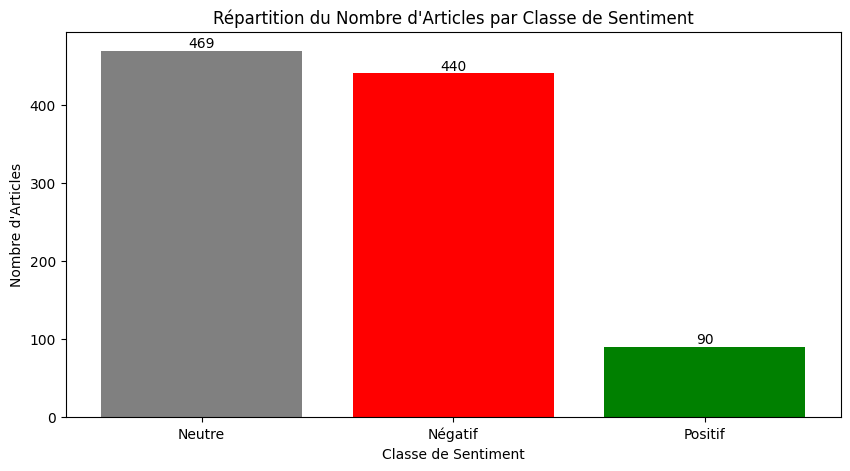

In [61]:
# Compter le nombre d'articles par classe de sentiment
sentiment_counts = filtered_df['sentiment_bert'].value_counts()

# Définir les couleurs selon la classe de sentiment
colors = ['green' if sentiment == 'Positif' else 'red' if sentiment == 'Négatif' else 'gray' for sentiment in sentiment_counts.index]

# Créer un graphique à barres pour visualiser la répartition
plt.figure(figsize=(10, 5))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

# Ajouter le nombre d'articles au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Répartition du Nombre d\'Articles par Classe de Sentiment')
plt.xlabel('Classe de Sentiment')
plt.ylabel('Nombre d\'Articles')
plt.xticks(rotation=0)
plt.show()

In [62]:
# Sélectionner un texte de chaque classe de sentiment en vérifiant la présence de données
try:
    texte_positif = filtered_df[filtered_df['sentiment_bert'] == 'Positif']['text'].iloc[0]
    print("Texte Positif:", texte_positif)
except IndexError:
    print("Aucun texte positif disponible.")

try:
    texte_negatif = filtered_df[filtered_df['sentiment_bert'] == 'Négatif']['text'].iloc[0]
    print("Texte Négatif:", texte_negatif)
except IndexError:
    print("Aucun texte négatif disponible.")

try:
    texte_neutral = filtered_df[filtered_df['sentiment_bert'] == 'Neutre']['text'].iloc[0]
    print("Texte Neutre:", texte_neutral)
except IndexError:
    print("Aucun texte neutre disponible.")


Texte Positif: INNOVATION TECHNOLOGIQUE :  met au point le "Tamé émergence"

L’inventeur  vient de mettre au point le «Tamé émergence», en partenariat avec , un célèbre artisan basé à Kolda. Ils ont procédé, dimanche dernier, à la présentation de ce nouveau produit aux Koldois.
Après l’invention de la machine à décortiquer le fonio qui a été suivie par la moissonneuse de criquets et la moto faucheuse appliquée à la récolte du fonio, l’inventeur , ex-directeur général de l’Office national de formation professionnelle (Onfp), vient de mettre au point le «Tamé émergence», en partenariat avec un artisan basé à Kolda. «C’est un tamis dont la fabrication et la présentation par rapport au produit traditionnel ont été améliorées et qui offre plus de sécurité à l’utilisateur», explique . Ce nouveau produit qui contribuera à l’allégement des travaux des femmes, notamment pour la préparation du couscous et de la bouillie à base des céréales comme le mil, le maïs, le sorgho, le riz et même le mani

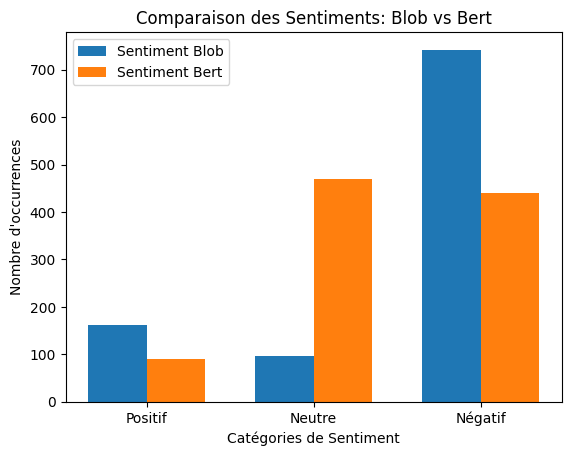

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Votre DataFrame est déjà défini, supposons qu'il est nommé df

# Calculer le nombre de sentiments pour chaque modèle
sentiment_counts_blob = filtered_df['Sentiment_blob'].value_counts()
sentiment_counts_bert = filtered_df['sentiment_bert'].value_counts()

# Préparer les données pour le graphique
categories = ['Positif', 'Neutre', 'Négatif']  # Assurez-vous que ces catégories correspondent exactement aux données de votre DataFrame
counts_blob = [sentiment_counts_blob.get(category, 0) for category in categories]
counts_bert = [sentiment_counts_bert.get(category, 0) for category in categories]

# Création de l'histogramme
x = range(len(categories))  # les emplacements des barres sur l'axe des x
width = 0.35  # la largeur des barres

fig, ax = plt.subplots()
bars_blob = ax.bar(x, counts_blob, width, label='Sentiment Blob')
bars_bert = ax.bar([p + width for p in x], counts_bert, width, label='Sentiment Bert')

# Ajout des titres et des légendes
ax.set_xlabel('Catégories de Sentiment')
ax.set_ylabel('Nombre d\'occurrences')
ax.set_title('Comparaison des Sentiments: Blob vs Bert')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(categories)
ax.legend()

# Afficher le graphique
plt.show()

In [64]:
# Afficher un exemple de texte classé comme positif par BERT et par TextBlob
positif_bert_textblob = filtered_df[
    (filtered_df['sentiment_bert'] == 'Positif') & 
    (filtered_df['sentiment_bert'] == 'Positif')
].head(1)
print("Positif avec Bert et TextBlob:\n", positif_bert_textblob['text'].values, "\n")

# Afficher un exemple de texte classé comme négatif par BERT et positif par TextBlob
negatif_bert_positif_textblob = filtered_df[
    (filtered_df['sentiment_bert'] == 'Négatif') & 
    (filtered_df['sentiment_bert'] == 'Négatif')
].head(1)
print("Négatif avec Bert et Négatif avec TextBlob:\n", negatif_bert_positif_textblob['text'].values, "\n")

# Afficher un exemple de texte classé comme neutre par BERT et positif par TextBlob
neutre_bert_positif_textblob = filtered_df[
    (filtered_df['sentiment_bert'] == 'Neutre') & 
    (filtered_df['sentiment_bert'] == 'Neutre')
].head(1)
print("Neutre avec Bert et Neutre avec TextBlob:\n", neutre_bert_positif_textblob['text'].values, "\n")

Positif avec Bert et TextBlob:
 ['INNOVATION TECHNOLOGIQUE :  met au point le "Tamé émergence"\n\nL’inventeur  vient de mettre au point le «Tamé émergence», en partenariat avec , un célèbre artisan basé à Kolda. Ils ont procédé, dimanche dernier, à la présentation de ce nouveau produit aux Koldois.\nAprès l’invention de la machine à décortiquer le fonio qui a été suivie par la moissonneuse de criquets et la moto faucheuse appliquée à la récolte du fonio, l’inventeur , ex-directeur général de l’Office national de formation professionnelle (Onfp), vient de mettre au point le «Tamé émergence», en partenariat avec un artisan basé à Kolda. «C’est un tamis dont la fabrication et la présentation par rapport au produit traditionnel ont été améliorées et qui offre plus de sécurité à l’utilisateur», explique . Ce nouveau produit qui contribuera à l’allégement des travaux des femmes, notamment pour la préparation du couscous et de la bouillie à base des céréales comme le mil, le maïs, le sorgho, 